# Data Preprocessing

In [1]:
import json
import matplotlib as mlp
import matplotlib.pyplot as plt
import os

from config import DATA_FOLDER

mlp.rcParams.update({'font.size': 15})

# Data Exploration

In [2]:
with open(os.path.join(DATA_FOLDER, "train.json"), "r") as df:
    train_documents = json.load(df)
with open(os.path.join(DATA_FOLDER, "valid.json"), "r") as df:
    valid_documents = json.load(df)
with open(os.path.join(DATA_FOLDER, "test.json"), "r") as df:
    test_documents = json.load(df)

N. train documents: 1045 (68012)
N. valid documents: 149 (9620)
N. test documents: 294 (18288)


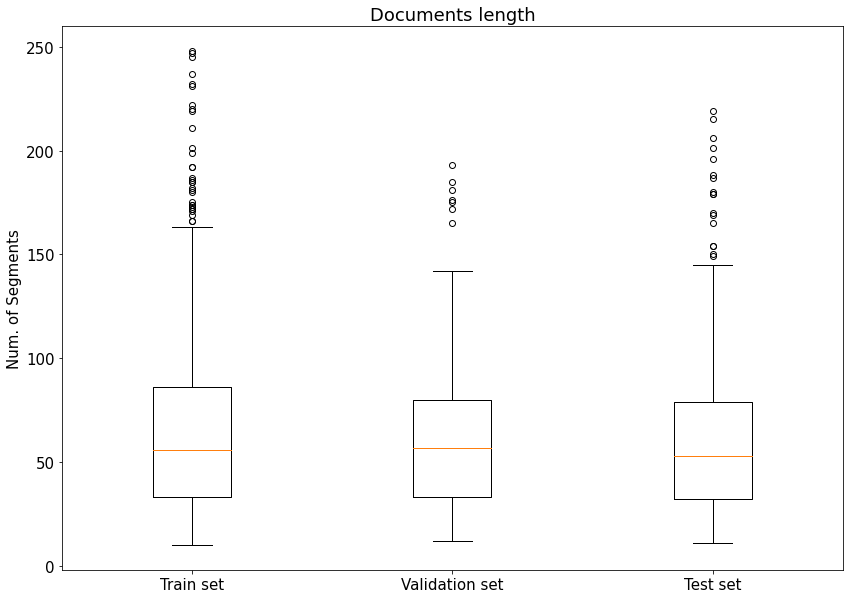

Max document length: 248


In [3]:
dataset_documents_length = {}
for dataset, dataset_name in [
    (train_documents, "train"),
    (valid_documents, "valid"),
    (test_documents, "test")
]:
    print(f"N. {dataset_name} documents: {len(dataset)} ({sum([len(document['segments']) for document in dataset])})")
    dataset_documents_length[dataset_name] = [len(document["segments"]) for document in dataset]

plt.figure(figsize=(14,10))
plt.boxplot(
    [
        dataset_documents_length["train"],
        dataset_documents_length["valid"],
        dataset_documents_length["test"]
    ],
    labels = ["Train set", "Validation set", "Test set"]
)
plt.ylabel("Num. of Segments")
plt.title("Documents length")
plt.show()

max_document_length = max(
    dataset_documents_length["train"]
    + dataset_documents_length["valid"]
    + dataset_documents_length["test"]
)
print(f"Max document length: {max_document_length}")